In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
import pickle

## Logistic Regression
Commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?)

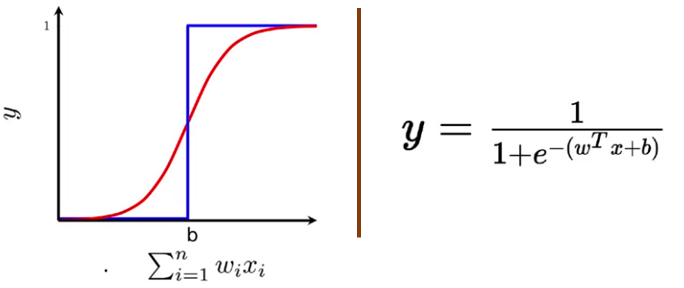

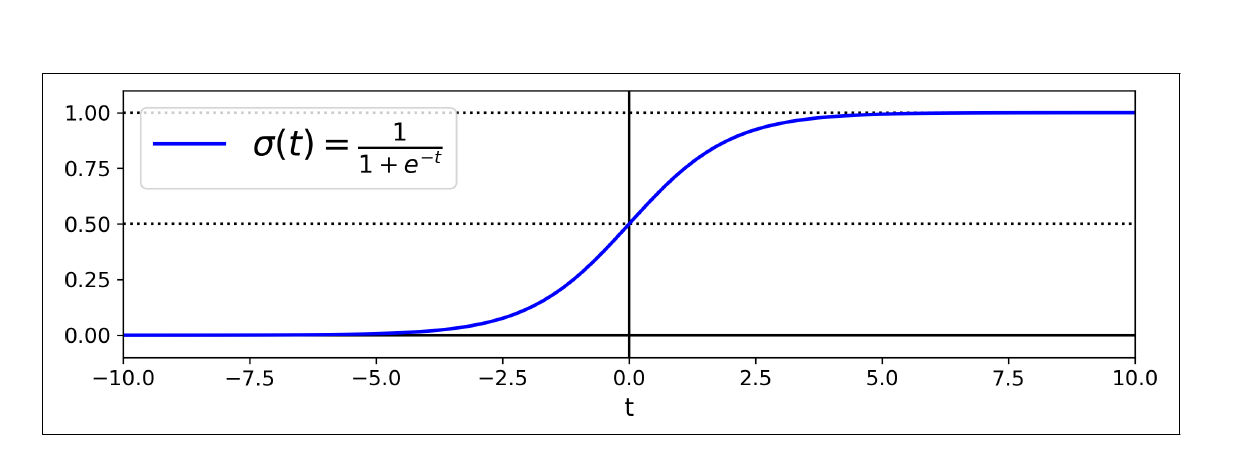

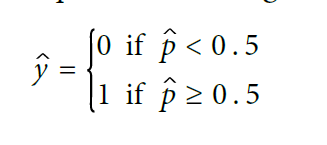

This score is often called the logit: this name comes from the fact that the logit function, defined as logit(p) = log(p / (1 - p)), is the inverse of the logistic function. Indeed, if you compute the logit of the estimated probability p, you will find that the result is t.

#### Logistic Loss Function for a single training instance
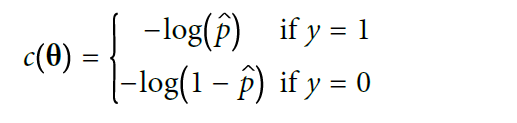

### Logistic Regression Loss function (across the whole training set)
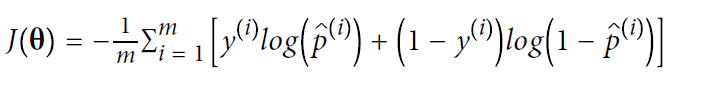

There is no closed form solution. However, this function is convex. Gradient Descend can find a global minimum. 

Partial Derivate of this loss function with respect to weight j is:
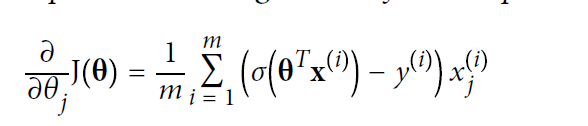

In [ ]:
iris = datasets.load_iris()
list(iris.keys())

In [ ]:
print(iris.DESCR)

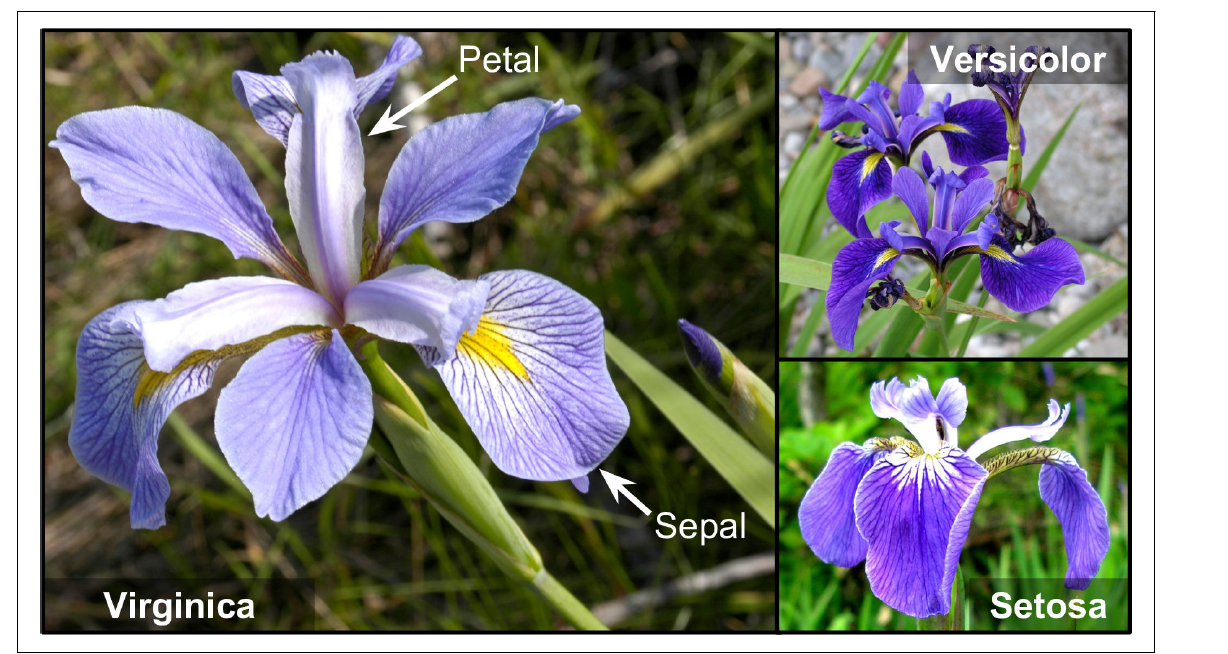

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [ ]:
iris.feature_names

In [ ]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
iris_df.head()

In [ ]:
y_df = pd.DataFrame(iris['target'],columns=['target'])

In [ ]:
y_virginica = y_df[y_df['target'] == 2].index

In [ ]:
indices = list(y_virginica)

In [ ]:
iris_df.iloc[indices].describe()

In [ ]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [ ]:
log_reg.predict([[1.7], [1.5]])

In [ ]:
log_reg.predict_proba([[1.7], [1.5]])

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)



In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )


In [ ]:
x0.shape,x1.shape

In [ ]:
x0.ravel().shape

In [ ]:
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)


In [ ]:
log_reg.coef_,log_reg.intercept_

In [ ]:
log_reg.predict_proba([[1.7,5.7], [1.2,8.1]])

#### Regularization Parameter for LR
The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

### Softmax Function
Linear Regression score of a single class k = 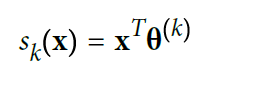

Softmax Score = 
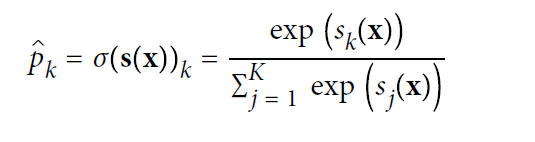



* K is the number of classes
* s(x) is a vector containing the scores of each class for the instance x.
* σ(s(x))k is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.

Softmax scores are individual probabilities that should sum to 1. The class with maximum probability becomes our prediction

#### Important: 
The Softmax function predicts only one class at a time i.e., it is multiclass, not multi-lebel. So it should be used only with mutually exclusive classes such as different types of plants. You cannot use it, for example to recognize multiple people in one picture, or in cases where a new picture given to a trained model may not contain any of your classes

### Cross-Entropy Loss
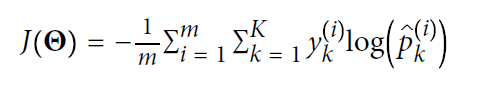

yk
i is the target probability that the ith instance belongs to class k. In general, it is
either equal to 1 or 0, depending on whether the instance belongs to the class or
not.

Cross-entropy Gradient vector for every class of every class:
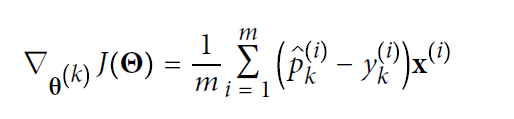

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

In [ ]:
cancer_data = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target,stratify = cancer_data.target,
    shuffle = True,random_state=144)

In [ ]:
logreg = LogisticRegression(solver="lbfgs",random_state=42,max_iter=10000)
logreg.fit(X_train, y_train)

In [ ]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logreg_scaled = logreg.fit(X_train_scaled, y_train)
print("Train set accuracy: {:.2f}".format(logreg_scaled.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))
